# <center>Final Project - Intro to CS for Data Science</center>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import numpy as np
import seaborn as sns
import string

## <center>Customer Data Analysis</center>

### 1. Load and Inspect the Data

Let's start by importing our customer dataset into a pandas dataframe:

In [2]:
customer_data = pd.read_csv('./customers.csv', encoding='utf-8')

In [3]:
customer_data.head()

,id,age,gender,email,business_nature,company,position,payment_method,name,targets
0,0,26,Male,gmail.com,Communications,NaN,customer service officer,A,John__melgarejo,20670.07;20632.81;20722.58;20332.79;20662.55
1,1,31,Male,ymail.com,Government,NaN,助理客戶服務主管,A,William___kerne,31551.75;32431.83
2,2,26,Male,yahoo.com.hk,Retail / Wholesale,NaN,店務員,A,James___kadner,21686.08;21282.62;21566.40
3,3,52,Male,gmail.com,Other,NaN,MANAGER,NaN,Charles__MUHL,26055.26;26039.48;25986.92
4,4,22,Male,gmail.com,Retail / Wholesale,NaN,sales,A,george___baridon,15950.31


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9189 entries, 0 to 9188
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               9189 non-null   int64 
 1   age              9189 non-null   int64 
 2   gender           8874 non-null   object
 3   email            9012 non-null   object
 4   business_nature  8978 non-null   object
 5   company          8906 non-null   object
 6   position         8914 non-null   object
 7   payment_method   5865 non-null   object
 8   name             9189 non-null   object
 9   targets          9104 non-null   object
dtypes: int64(2), object(8)
memory usage: 718.0+ KB


* We observe that we have ***9189*** samples (customers) each with ***10*** variables.
* We have ***2*** numerical features (**id** and **age**)
* We have ***8*** categorical features (**gender**, **email**, **business nature**, **company**, **position**, **payment method**, **name** and **targets**)
* It apears that we are missing values in certain features (**gender**, **email**, **business nature**, **company**, **position**, **payment method**(a lot) and **targets**)

### 2. Data Cleaning

Next, we need to clean our data so we can later analyze it with a greater degree of reliability. Below are the actions we will perform:
* Split the `name` column
* Split the `target` column
* Handle missing values
* Handle outliers
* Handle data inconsistencies
* Standardize the data

#### Splitting the `name` column

The name column contains both the customer's first and last name which isn't practical. Let's split the name feature into two features: first name and last name.<br>

Since the fullnames have a varying number of `_` charcters between the first and last name, we had to use regular expressions to extract the text before and after the delimiter.

In [5]:
pattern = r'^([^_]+)_+([^_]+)$'
customer_data[['first_name', 'last_name']] = customer_data['name'].str.extract(pattern)

# Capitalize first and last name
customer_data['first_name'] = customer_data['first_name'].str.capitalize()
customer_data['last_name'] = customer_data['last_name'].str.capitalize()

# Drop original 'name' column
customer_data.drop(columns='name', inplace=True)

customer_data.head()

,id,age,gender,email,business_nature,company,position,payment_method,targets,first_name,last_name
0,0,26,Male,gmail.com,Communications,NaN,customer service officer,A,20670.07;20632.81;20722.58;20332.79;20662.55,John,Melgarejo
1,1,31,Male,ymail.com,Government,NaN,助理客戶服務主管,A,31551.75;32431.83,William,Kerne
2,2,26,Male,yahoo.com.hk,Retail / Wholesale,NaN,店務員,A,21686.08;21282.62;21566.40,James,Kadner
3,3,52,Male,gmail.com,Other,NaN,MANAGER,NaN,26055.26;26039.48;25986.92,Charles,Muhl
4,4,22,Male,gmail.com,Retail / Wholesale,NaN,sales,A,15950.31,George,Baridon


#### Splitting the `target` column

Next we observe that the `target` feature contains strings representing numerical values seperated by a `;`. This isn't practical for analysis and we will need to clean this as follows:
* Split the `;` seperated values in the targets column into a list.
* Convert the target list into numerical values.
* Calculate mean, std and count.

In [6]:
# Split the targets column by ';' into a list
customer_data['target list'] = customer_data['targets'].str.split(';')

# Convert target list to numeric values
customer_data['target list'] = customer_data['target list'].apply(lambda x: pd.to_numeric(x))

# Calculate mean and SD of target list
customer_data['target_mean'] = customer_data['target list'].apply(lambda x: np.mean(x))
customer_data['target_std'] = customer_data['target list'].apply(lambda x: np.std(x))

# Calculate count of target list, we need to check if target list is NaN, since it will still return size 1 in that case and we want it to return 0
customer_data['target_count'] = customer_data['target list'].apply(lambda x: np.size(x) if not np.any(np.isnan(x)) else 0)

# Drop original 'targets' column
customer_data.drop(columns='targets', inplace=True)

customer_data.head()

,id,age,gender,email,business_nature,company,position,payment_method,first_name,last_name,target list,target_mean,target_std,target_count
0,0,26,Male,gmail.com,Communications,NaN,customer service officer,A,John,Melgarejo,"[20670.07, 20632.81, 20722.58, 20332.79, 20662...",20604.16,138.736669,5
1,1,31,Male,ymail.com,Government,NaN,助理客戶服務主管,A,William,Kerne,"[31551.75, 32431.83]",31991.79,440.040000,2
2,2,26,Male,yahoo.com.hk,Retail / Wholesale,NaN,店務員,A,James,Kadner,"[21686.08, 21282.62, 21566.4]",21511.70,169.192317,3
3,3,52,Male,gmail.com,Other,NaN,MANAGER,NaN,Charles,Muhl,"[26055.26, 26039.48, 25986.92]",26027.22,29.215516,3
4,4,22,Male,gmail.com,Retail / Wholesale,NaN,sales,A,George,Baridon,[15950.31],15950.31,0.000000,1


#### Missing Values

Let's start handling the missing values in our customer dataset.
First we need to check the percentage of missing values in each column.

In [7]:
def print_missing_percentage(df):
    """
    This function takes a dataframe and prints all columns and their missing values as a % of total values
    """
    # Calculate the percentage of missing values in all columns
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    
    # Create a dataframe
    missing_percentage = pd.DataFrame({'Column': missing_percentage.index, 'Missing %': missing_percentage.values})
    
    # Sort dataframe in descending order
    missing_percentage = missing_percentage.sort_values(by='Missing %', ascending=False, ignore_index=True)
    
    print(missing_percentage)

In [8]:
print_missing_percentage(customer_data)

             Column  Missing %
0    payment_method  36.173686
1            gender   3.428012
2           company   3.079769
3          position   2.992709
4   business_nature   2.296224
5             email   1.926216
6       target list   0.925019
7       target_mean   0.925019
8        target_std   0.925019
9                id   0.000000
10              age   0.000000
11       first_name   0.000000
12        last_name   0.000000
13     target_count   0.000000


Below is an outline of how we will handle the missing data in each of the columns:
* `payment_method`:
  * The `payment_method` column has a significant portion of missing values (36%), and droppping rows might lead to a significant loss of information. Therefore, a better idea would be to introduce an 'unknown' category to represent the missing values.
* `gender`, `business_nature`, `company`, `position`, `email`:
    * These columns have a relatively small missing percentage (<5%).
    * For `gender` and `business_nature`, we can replace missing values with the most frequent category.
    * For `company`, `position` and `email`, we can introduce an 'unknown' category
* `target_list`, `target_mean`, `target_sd`:
    * We will leave these columns as is and simply ignore NaN values when performing calculations

#### Outliers

Next, we will search for outliers in our numerical categories. We will start by creating boxplots to better visualize the distribution.

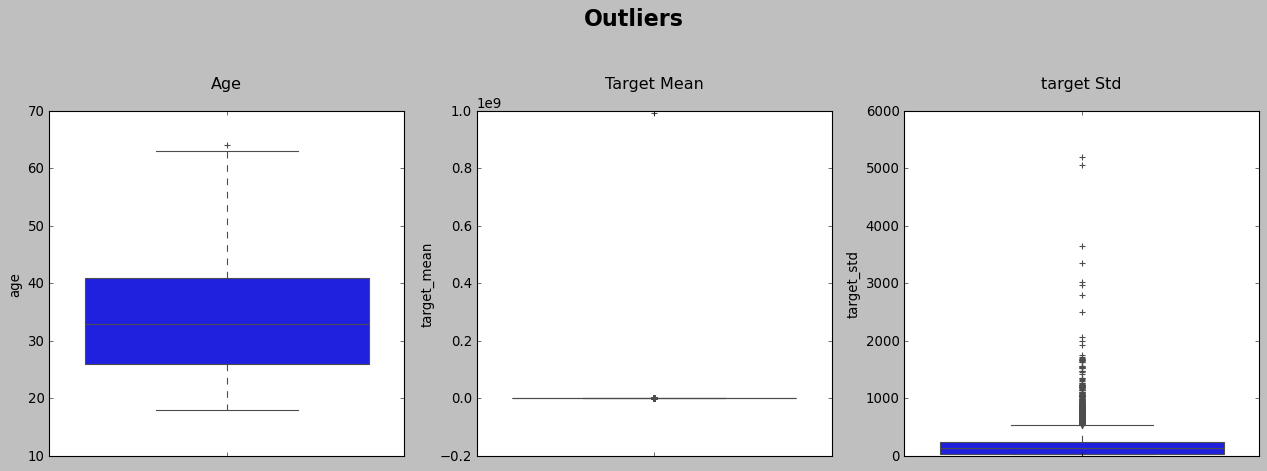

In [9]:
# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
fig.suptitle('Outliers\n', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=1.5)

# Create boxplots for age, target_mean and target_std
sns.boxplot(y='age', data=customer_data, ax=axes[0])
sns.boxplot(y='target_mean', data=customer_data, ax=axes[1])
sns.boxplot(y='target_std', data=customer_data, ax=axes[2])

# Add titles
axes[0].set_title('Age\n')
axes[1].set_title('Target Mean\n')
axes[2].set_title('target Std\n')

plt.tight_layout();

* `age` - We observe that there are a few outliers above 60, probably representing older customers. But there apears to be a reasonable range of ages so no further cleaning will be necessary.
* `target_mean` - There is a noticable skew with outliers on the higher end, indicating that a few customers have significantly higher target means. This will have a significant impact on further calculations and based on the boxplot our outliers are above the 200,000 level.
* `target_std` - There is a noticable skew with outliers on the higher end, indicating that a few customers have significantly higher variability in their target values. This has a significant impact on further calculations and based on the boxplot our outliers are above the 2,000 level.

Based on the above, the actions we will need to take on outliers are as follows:
* `target_mean` - We will remove rows with a target mean above 200,000
* `target_std`  - We will remove rows with a target std above 2,000

#### Data Inconsistencies and Standardization

In the upcoming sections we will standardize and amend inconsistencies in the `gender`, `email`, `business_nature`, `company` and `position` columns using various string manipulation techniques. These cleaning methods will be encapsulated within a class.
* `correct_str_values` - Some strings have incorrect values (e.g 'gamil.com', 'gmail.con'). We should have a method that corrects these typos
* `trim_whitespace` - Some string values have unecessary whitespace in them (e.g '    mechanic'). We should have a method that handles this.
* `capitalize_words` - We would like some strings to be represented with every word in capital letters (e.g positions).
* `lowercase` - We would like some strings to be represented in lowercase (e.g emails).
* `remove_punctuation` - Removing punctuation and special characters will help standardize company names.
* `handle_duplicates` - We would like to eliminate duplicate rows since that would skew our data.

#### Create a class to encapsulate data cleaning tasks

In [10]:
class Data_Cleaner:
    def __init__(self, df):
        self.df = df.copy()

    
    def handle_missing_values(self):
        '''
            This method replaces missing values in a provided dataframe based on the following logic.
            - payment_method: NaN => 'unknown'
            - gender: NaN => mode
            - business_nature: NaN => mode
            - company: NaN => 'unknown'
            - position: NaN => 'unknown'
            - email: NaN => 'unknown'
        '''

        self.df['payment_method'] = self.df['payment_method'].fillna('unknown')
        self.df['gender'] = self.df['gender'].fillna(self.df['gender'].mode()[0])
        self.df['business_nature'] = self.df['business_nature'].fillna(self.df['business_nature'].mode()[0])
        self.df['company'] = self.df['company'].fillna('unknown')
        self.df['position'] = self.df['position'].fillna('unknown')
        self.df['email'] = self.df['email'].fillna('unknown')

        return self.df

    
    def handle_outliers(self):
        '''
            This method handles outlier values in a provided dataframe based on the following logic.
            - target_mean: remove values over 200,000
            - target_std: remove values over 2,000
        '''
        self.df = self.df[self.df['target_mean'] < 200000]
        self.df = self.df[self.df['target_std'] < 2000]

        return self.df

    
    def correct_str_values(self, col, corrections):
        '''
            This method replaces str values contained in a provided dictionary, based on a provided column name.
        '''
        for old_str, new_str in corrections.items():
            self.df[col] = self.df[col].astype(str).str.replace(old_str, new_str)

        return self.df

    
    def trim_whitespace(self, col):
            '''
                This method trims string whitespace in a dataframe based on a provided column name.
            '''
            self.df[col] = self.df[col].str.strip()
    
            return self.df
    
    
    def capitalize_words(self, col):
        '''
            This method capitalizes all words in a string in a dataframe based on a provided column name.
            If the string length is smaller than 3 (e.g. 'IT') it converts the entire string to uppercase.
        '''
        self.df[col] = self.df[col].apply(lambda x: str.title(x) if len(x) > 2 else str.upper(x))

        return self.df


    def lowercase(self, col):
            '''
                This method converts strings to lowercase in a dataframe based on a provided column name.
            '''
            self.df[col] = self.df[col].str.lower()
    
            return self.df


    def remove_punctuation(self, col):
            '''
                This method removes punctuation and special characters from strings in a dataframe based on a provided column name.
            '''
            self.df[col] = self.df[col].astype(str).str.translate(str.maketrans('', '', string.punctuation))
    
            return self.df

    
    def handle_duplicates(self, cols):
            '''
                This method drops duplicate rows in a dataframe based on a provided list of column names.
            '''
            self.df = self.df.drop_duplicates(subset=cols, keep='first', ignore_index=True)
    
            return self.df

In [11]:
# Create an instance of the Data_Cleaner class
customer_data_cleaner = Data_Cleaner(customer_data)

# Handle missing values
customer_data_clean = customer_data_cleaner.handle_missing_values()

# Handle outliers
customer_data_clean = customer_data_cleaner.handle_outliers()

In [12]:
# Making sure all missing values were handled
print_missing_percentage(customer_data_clean)

             Column  Missing %
0                id        0.0
1               age        0.0
2            gender        0.0
3             email        0.0
4   business_nature        0.0
5           company        0.0
6          position        0.0
7    payment_method        0.0
8        first_name        0.0
9         last_name        0.0
10      target list        0.0
11      target_mean        0.0
12       target_std        0.0
13     target_count        0.0


#### Cleaning the `email` column

In [13]:
# Trim whitespace
customer_data_clean = customer_data_cleaner.trim_whitespace('email')

# Convert to lowercase
customer_data_clean = customer_data_cleaner.lowercase('email')

# Create dictionary of correct email values
email_corrections = {
            'gamil.com': 'gmail.com',
            'gmail.con': 'gmail.com'
        }

# Apply corrections to dataframe
customer_data_clean = customer_data_cleaner.correct_str_values('email', email_corrections)

#### Cleaning the `business_nature` column

In [14]:
# Trim whitespace
customer_data_clean = customer_data_cleaner.trim_whitespace('business_nature')

# Capitalize all string words
customer_data_clean = customer_data_cleaner.capitalize_words('business_nature')

#### Cleaning the `company` column

The position column needs significant cleaning. We will perform the following steps in order to more accurately group companies: 
1. Translate top 20 chinese company text values to English
2. Convert to lowercase (to ensure consistency and avoid case-sensitive mismatching later on).
3. Remove Punctuation and Special Characters
4. Trim Whitespace
5. Standardize common abbreviations and terms (e.g Ltd. vs Limited, Inc. vs Incorporated)

##### Translate Chinese Text

* I considered the option of using an external library like `googleTrans' or 'translate' for this task. However, I encountered many issues when using the free versions such as the servers being overloaded or offline for unpredictable portions of the day. This felt like an unreliable way to build this project, and would expose myself to the risk of it not working as intended for other users.
* Manual translation was also an option I considered, but would probably take a large amount of time.
* Therefore, I decided that manual translation of the top values should increase the reliability of the data enough to proceed with the analyses.

In [15]:
# Create dictionary of translated top company values
company_translations = {
    '大家樂': 'cafe de coral',
    '消防處': 'fire department',
    '機場保安有限公司': 'airport security',
    '順豐速運': 'sf express',
    '醫院管理局': 'hospital authority',
    '大快活': 'great happiness',
    '中國建築': 'chinese arcitecture',
    '懲教署': 'correctional services depertment',
    '香港政府': 'hk government',
    '美聯物業': 'midland realty',
    '天和工程有限公司': 'tianhe engineering',
    '自僱': 'self employed',
    '美心集團': "maxim's",
    '香港賽馬會': 'hk jockey club',
    '康業服務有限公司': 'hong yip services',
    '牛奶公司': 'milk company',
    '金門建築有限公司': 'kinmen construction',
    '的士司機': 'taxi driver',
    '啟勝管理服務有限公司': 'kai shing management services',
    '香港海關': 'hk customs and excise department',
    '瑪麗醫院': 'queen mary hospital',
    '中原地產': 'centaline real estate'
}

# Apply translations to dataframe
customer_data_clean = customer_data_cleaner.correct_str_values('company', company_translations)

##### Perform other string cleaning operations

In [16]:
# Convert to lowercase
customer_data_clean = customer_data_cleaner.lowercase('company')

# Remove punctuation and special characters
customer_data_clean = customer_data_cleaner.remove_punctuation('company')

# Create dictionary of correct company values
company_corrections = {
        '\t': '',
        'limited': '',
        'ltd': '',
        'the': '',
        'hong kong': 'hk',
        'group': '',
        'groups': '',
        ' co ': ''
        }

# Apply corrections to dataframe
customer_data_clean = customer_data_cleaner.correct_str_values('company', company_corrections)

# Trim whitespace
customer_data_clean = customer_data_cleaner.trim_whitespace('company')

#### Cleaning the `position` column

The position column also needs significant cleaning. We will perform the following steps in order to more accurately group positions: 
1. Trim Whitespace
2. Capitalize all words
3. Translate the top 10 Chinese positions into English
4. Group together 'cook' and 'chef'
5. Group together 'sales manager' and 'sales'
6. Change 'Security Guard員' into 'Security Guard'

In [18]:
# Trim whitespace
customer_data_clean = customer_data_cleaner.trim_whitespace('position')

# Capitalize all string words in columns
customer_data_clean = customer_data_cleaner.capitalize_words('position')

# Create dictionary of correct position values
position_corrections = {
    'Cook': 'Chef',
    'Sales manager': 'Sales',
    '司機': 'Driver',
    '廚師': 'Chef',
    '文員': 'Clerk',
    '技工': 'Mechanic',
    '倉務員': 'Warehouseman',
    '經理': 'Manager',
    '保安': 'Security Guard',
    '售貨員': 'Sales',
    '侍應': 'Waiter',
    '技術員': 'Technician',
    'Security Guard員': 'Security Guard'    
}

# Apply corrections to dataframe
customer_data_clean = customer_data_cleaner.correct_str_values('position', position_corrections)

#### Remove Duplicate Rows

In [19]:
# Remove duplicate rows based on the following columns
customer_data_clean = customer_data_cleaner.handle_duplicates(['first_name', 'last_name', 'age', 'gender', 'email', 'company', 'position'])

### 3. Data Summarization and Exploration

#### Descriptive Statistics

First, we will calculate summary statistics for numerical features in the dataset.

In [20]:
# Gererate descriptive statistics for the numerical columns
summary_stats = customer_data_clean[['age', 'target_mean', 'target_std', 'target_count']].describe()

# Display the results rounded to 2 decimal places
print(summary_stats.round(2))

           age  target_mean  target_std  target_count
count  9078.00      9078.00     9078.00       9078.00
mean     34.39     29793.90      169.82          2.98
std      10.15     19868.00      188.30          1.42
min      18.00     -1950.88        0.00          1.00
25%      26.00     18580.13       30.52          2.00
50%      32.00     24257.49      132.73          3.00
75%      41.00     33677.59      235.86          4.00
max      64.00    199720.77     1991.43          5.00


Next, we will summarize our categorical features using frequency tables.

In [21]:
# Create function for creating and printing freuqnecy tables
def display_freq_table(df, cols):
    """
    This function takes in a list of column names and for each of them creates and prints a frequency table
    """
    for col in cols:
        # Calculate unique value counts
        col_value_counts = (df[col].value_counts(normalize=True) * 100).round(2)
        freq_table = col_value_counts.to_frame(name='%')
    
        # Display the top 5 categories (or all if less than 5)
        print(f'\nFrequency Table for {col}:')
        print(freq_table.head(5))

In [22]:
# Generate frequency tables for the categorical columns
categorical_columns = ['gender', 'email', 'business_nature', 'company', 'position', 'payment_method']

display_freq_table(customer_data_clean, categorical_columns)


Frequency Table for gender:
           %
gender      
Male    75.8
Female  24.2

Frequency Table for email:
                  %
email              
gmail.com     41.72
yahoo.com.hk  24.56
hotmail.com   15.43
yahoo.com      2.39
unknown        1.69

Frequency Table for business_nature:
                        %
business_nature          
Other               14.00
Retail / Wholesale  11.62
Food Services       10.35
Construction         8.21
Transportation       6.32

Frequency Table for company:
                       %
company                 
unknown             2.25
hsbc                0.44
hospital authority  0.40
pccw                0.33
hkt                 0.31

Frequency Table for position:
             %
position      
Sales     4.78
Clerk     3.57
Driver    2.96
Manager   2.71
Chef      2.67

Frequency Table for payment_method:
                    %
payment_method       
A               47.75
unknown         35.55
B                8.47
C                8.23


#### Data Visualization

Now that we have clean customer data, let's put it all together and take a visual look at our customers.

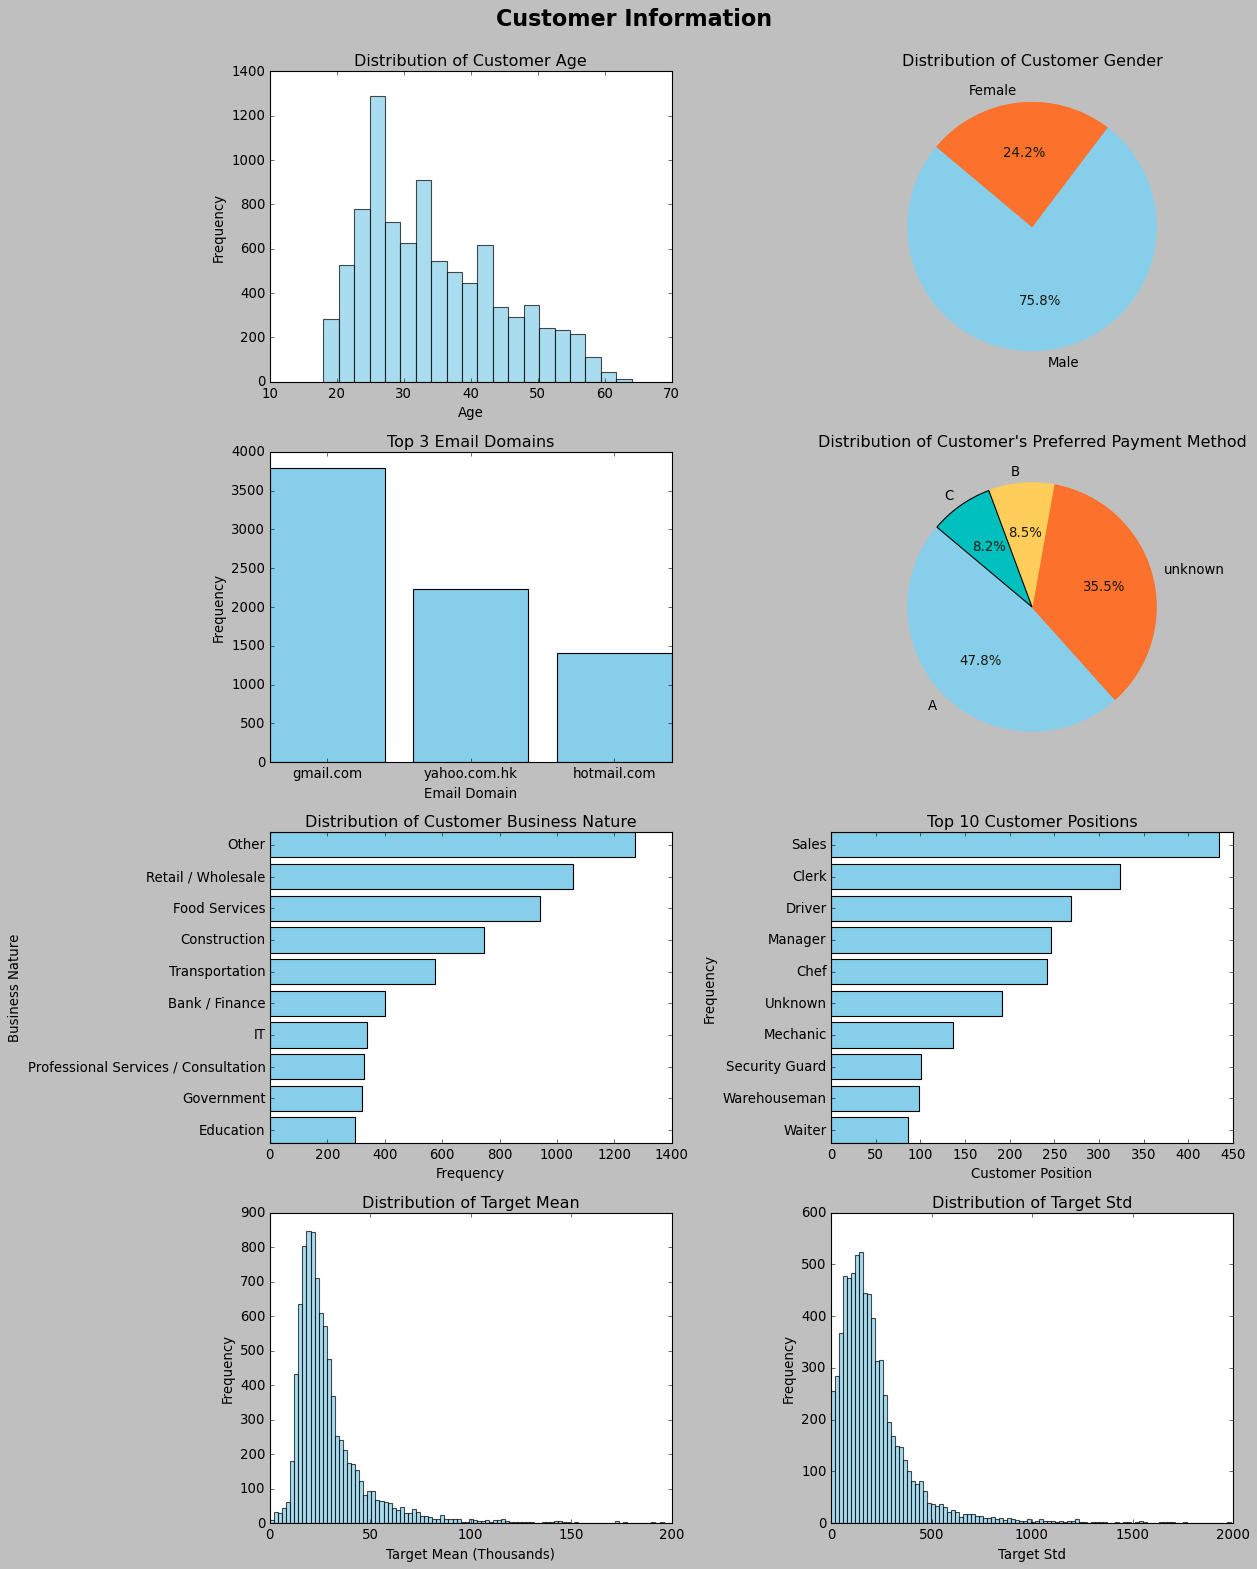

In [23]:
# Create figure and axes
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,20))
fig.suptitle('Customer Information\n', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=1.5)

# Plot a histogram of the 'age' column
ax[0, 0].hist(customer_data_clean['age'], bins=20, color='skyblue', alpha=0.7)

# Set age labels and title
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_title('Distribution of Customer Age')

# Plot a pie chart of the 'gender' column
gender_counts = customer_data_clean['gender'].value_counts()
wedges, texts, autotexts= ax[0, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Change font color or percentages
for autotext in autotexts:
    autotext.set_color('#16180c')

# Change wedge colors
wedges[0].set_color('skyblue')
wedges[1].set_color('#FC712B')

# Set gender title
ax[0, 1].set_title('Distribution of Customer Gender')

# Get the top 3 email domains
top_email_domains = customer_data_clean['email'].value_counts().head(3)
top_email_domains_pct = top_email_domains.sum() * 100 / customer_data_clean['email'].notnull().sum()

# Plot a bar chart of the top email domains
ax[1, 0].bar(top_email_domains.index, top_email_domains.values, color='skyblue')

# Set email labels and title
ax[1, 0].set_xlabel('Email Domain')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_title('Top 3 Email Domains')

# Plot a pie chart of the 'payment_method' column
known_payment_methods = customer_data_clean[customer_data_clean['payment_method'] != 'Unknown']['payment_method']
top_payment_method = known_payment_methods.value_counts()
wedges, texts, autotexts = ax[1, 1].pie(top_payment_method, labels=top_payment_method.index, autopct='%1.1f%%', startangle=140)

# Change font color or percentages
for autotext in autotexts:
    autotext.set_color('#16180c')

# Change wedge colors
wedges[0].set_color('skyblue')
wedges[1].set_color('#FC712B')
wedges[2].set_color('#FECD5A')

# Set payment method title
ax[1, 1].set_title("Distribution of Customer's Preferred Payment Method")

# Get value counts for 'business nature'
business_nature_counts = customer_data_clean['business_nature'].value_counts(ascending=True).tail(10)

# Plot a horizontal bar chart of the business nature distribution
ax[2, 0].barh(business_nature_counts.index, business_nature_counts.values, color='skyblue')

# Set business nature labels and title
ax[2, 0].set_xlabel('Frequency')
ax[2, 0].set_ylabel('Business Nature')
ax[2, 0].set_title('Distribution of Customer Business Nature')

# Get value counts for top positions
top_positions = customer_data_clean['position'].value_counts(ascending=True).tail(10)

# Plot a bar chart of the top positions
ax[2, 1].barh(top_positions.index, top_positions.values, color='skyblue')

# Set top positions labels and title
ax[2, 1].set_xlabel('Customer Position')
ax[2, 1].set_ylabel('Frequency')
ax[2, 1].set_title('Top 10 Customer Positions')

# Convert units of target mean to thousands
target_mean_thousands = customer_data_clean['target_mean'] / 1000
target_mean_thousands = target_mean_thousands.round()

# Plot a histogram of the 'target_mean' column
ax[3, 0].hist(target_mean_thousands, bins=100, color='skyblue', alpha=0.7)

# Set x axis limit
ax[3, 0].set_xlim(left=0, right=200)

# Set target mean labels and title
ax[3, 0].set_xlabel('Target Mean (Thousands)')
ax[3, 0].set_ylabel('Frequency')
ax[3, 0].set_title('Distribution of Target Mean')

# Omit rows with a std of 0 (which indicates 1 value in target list)
target_std = customer_data_clean[customer_data_clean['target_std'] > 0]

# Plot a histogram of the 'target_std' column
ax[3, 1].hist(target_std['target_std'], bins=100, color='skyblue', alpha=0.7)

# Set x axis limit
# ax.set_xlim(left=0, right=10000)

# Set target std labels and title
ax[3, 1].set_xlabel('Target Std')
ax[3, 1].set_ylabel('Frequency')
ax[3, 1].set_title('Distribution of Target Std')

plt.tight_layout();

#### Distribution Analysis

Let's examine the shape of the distribution for our numerical features:
* **Age** - This looks like a normal distribution skewed to the right
* **Target Mean** - This looks like an asymetric distribution skewed to the right
* **Target Std** - This looks like an asymetric distribution skewed to the right

### 4. Conclusion

After exploring and visualizing our data we observe the following:
1. **Demographics**:
    * The majority of our customers are male (***75.8%***).
    * The average age of our customers is ***34.4*** with a std of ***10.1*** (which suggest a relatively wide age range among customers).
2. **Business Nature**:
    * Our customers span a wide range of companies.
    * We have a large concentration of customers in the **'Retail / Wholesale'** and **'Food Services'** industries.
    * The most common positions of our customers are **'Sales'** and **'Clerk'**, with **'driver'**, **'manager'** and **'chef'** close behind. 
3. **Online Behavior**:
    * Customers utilize a diverse range of email providers, **'gmail.com'**, **'yahoo.com.hk'** and **'hotmail.com'** are the most common.
    * Approximately ***80%*** of our customers use these **3** email providers.
    * Most of our customers prefer payment method **'A'**
4. **Target**:
    * Customers have target counts that are evenly distributed between ***1*** to ***5***.
    * Customers have a wide range of target mean values ranging from ***-1950*** to ***199,721***
    * Customers have high variability within their targets with std ranging from ***0*** to ***1991***

#### Potential areas of improvement:

* A considerable amount of customers lack identifiable company and industry information (***2.5%*** and ***14%*** respectively), and comprise our highest category in both features.
* Positions like **'Clerk'** and **'manager'** are generic titles and perhaps should be collected in the future as something more specific.
* There is a large portion of missing data for payment method (***35.5%***). We would need to take this into account when making decisions based on this.

#### Adding external data

If I could take data from the web here are some features that I could add:
1. **Purchase History**:
  * Include details like products purchased, purchase dates, amounts spent and frequency of purchases.
  * This could allow us analyse customer buying patterns and preferences.
2. **Website Browsing Behavior**:
  * Include data on pages visited, time spent on each page, products viewed and search queries.
  * This could help identify potential leads, optimize website design and imnprove product recommendations.
3. **Social Media Engagement**:
  * Include customer interactions with the company's social media pages, such as likes, comments, shares and follows.
  * This could help track social media campaign effectiveness and understand customer opinions.
4. **Industry and Company Information**:
  * For customers with known companies, gather information about their industry, company size and financial performance.
  * This could provide more context for customer purchasing behavior and decision-making processes.

To relate an external dataset to the samples in our dataset, we would need a common identifier or feature that exists in both datasets. In our dataset we have the following features we could potentially use for linking:
* **Email** - If the external dataset also contains customer email addresses, we could use those as a unique identifier to match records.
* **Company** - If the external dataset has information about companies, we could link them based on the 'company' column (As we will do in part 2 of this project)

#### Potential caveats to consider:

* **Data quality** - The external dataset might have different data quality standards, inconsistensies in formatting or missing values, making it difficult to accurately match records.
* **Linking accuracy** - Even with a common identifier, there is a risk of false positives or false negatives in the matching process, which can lower the reliability of the combined dataset.
* **Representative** - The external dataset might not be representative of our customer base which might lead to biased or inaccurate conclusions when combining the data.

## <center>Company Data Analysis</center>

### 1. Load and Inspect the Data

Let's start by importing our company data excel file into a dataframe

In [24]:
company_data = pd.read_excel('./companies.xlsx')
company_data

,company_id,name,domain,business_nature,employee_number,type,market_cap
0,"""00123122""",HSBC,www.hsbc.com/,banking,226059,public,78.45billion
1,878434523,AIA,www.aia.com,insurance,0,public,1.12T
2,3423656,MTR,http://www.mtr.com.hk/en/customer/main/index.html,Railway,28035,public,271B
3,452352,PCCW,http://www.pccw.com/,communications,22800,public,31.6001B
4,4342ff34,HKT,hkt.com,Telecom,"""15900.00""",public,$80.45B
5,534534,Manulife,https://www.manulife.com/,insurance,34000,public,$47.4 billion
6,232131,Cathay Pacific Airways,www.cathaypacific.com,airline,35000,public,$42.29 B
7,123555342,Hong Kong Police Force,https://www.police.gov.hk,law enforcement,36681,government,NaN
8,621621320,KPMG,home.kpmg,consulting,227000,NaN,NaN
9,998411df,HAECO,www.haeco.com,\tAerospace,16641,public,NaN


In [25]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company_id       11 non-null     object
 1   name             11 non-null     object
 2   domain           11 non-null     object
 3   business_nature  11 non-null     object
 4   employee_number  11 non-null     object
 5   type             10 non-null     object
 6   market_cap       8 non-null      object
dtypes: object(7)
memory usage: 748.0+ bytes


* We observe that we have ***11*** samples (companies) each with ***7*** variables.
* We have ***2*** numerical features (**employee_number** and **market_cap**).
* We have ***5*** categorical features (**company_id**, **name**, **domain**, **business nature** and **type**).
* It apears that we are missing values in the **'type'** and **'market_cap'** features.

### 2. Data Cleaning

#### Removing unecessary `"`

Let's start by removing unecessary `"` from **company_id** and **employee_number**. Since there is only one observation in each that has `"`, We can assume that this is a mistake and should correct and it. We can use our `Data_Cleaner` class from before to perform these tasks.

In [26]:
# Create an instance of the Data_cleaner class
company_data_cleaner = Data_Cleaner(company_data)

for col in ['company_id', 'employee_number']:
    company_data_clean = company_data_cleaner.correct_str_values(col, {'"': ''})

#### Cleaning the `name` column

We need to convert the company names to lowercase so they adhere to the standard we used in the customer dataset.

In [27]:
# Converting values to lowercase
company_data_clean = company_data_cleaner.lowercase('name')

# Trimming Whitespace
company_data_clean = company_data_cleaner.trim_whitespace('name')

# Apply corrections to dataframe
company_data_clean = company_data_cleaner.correct_str_values('name', {'hong kong': 'hk'})

#### Cleaning the `business_nature` column

* We observe a typo in one of the fields **'\tAerospace'**, This should be corrected.
* We should capitalize all words in business nature so its standardized.

In [28]:
# Remove '/t'
company_data_clean = company_data_cleaner.correct_str_values('business_nature', {'\t': ''})

# Capitalize all words
company_data_clean = company_data_cleaner.capitalize_words('business_nature')

#### Cleaning the `employee_number` column

* We want to convert the values in this column to integers so we can better work with it in the future.
* Having an employee number of 0 is probably a mistake, but it is possible for a company to have 0 employees. I found information online on AIA and according to this [source](https://leadiq.com/c/aia/5a1d8b0f240000240065ee74#:~:text=As%20of%20August%202024%2C%20AIA%20has%20approximately%2045K%20employees%20across,including%20AsiaOceaniaNorth%20America.) they have 45,000 employees.

In [29]:
# Convert values to integers
company_data_clean['employee_number'] = company_data_clean['employee_number'].astype(float).astype(int)

# Replace 0 with value we found online
company_data_clean.at[1, 'employee_number'] = 45000

#### Cleaning the `type` column

We have a missing value at index 8. Since **'KPMG'** is a private company we can go ahead and fill this value in manually. In general, if we are only missing few values we can make inquiries online or with the relevant parties in order to obtain information about the correctness of the data we fill in manually.

In [30]:
company_data_clean.at[8, 'type'] = 'private'

#### Cleaning the `market_cap` column

This column needs extensive cleaning and standardization. Below are the steps we will take:
* Eliminate strings and non numeric chars, keeping track of the multiplier (Billion / Trillion)
* Convert remaining digit values to numeric
* Multiply values by appropriate multiplier
* We will intentionally leave the **NaN** values as they represent 30% of our rows and removing them will cause significant loss of information. We will simply ignore them during statistical calculations.

In [31]:
# Convert 'billion' into 'B' and eliminate spaces
company_data_clean = company_data_cleaner.correct_str_values('market_cap', {'billion': 'B', ' ': ''})

# Create temporary market_cap_numeric and multiplier columns
company_data_clean[['market_cap_numeric', 'multiplier']] = company_data_clean['market_cap'].astype(str).str.extract(r'([0-9.]+)([BT]?)')

# Convert to numeric
company_data_clean = company_data_cleaner.correct_str_values('multiplier', {'B': '1', 'T': '1000'})
for col in ['market_cap_numeric', 'multiplier']:
    company_data_clean[col] = pd.to_numeric(company_data_clean[col], errors='coerce')

# Create new market_cap value based on numeric and mutiplier columns
company_data_clean['market_cap'] = (company_data_clean['market_cap_numeric'] * company_data_clean['multiplier']).round(2)

# Rename market_cap column to denote the unit (Billions)
company_data_clean.rename(columns={"market_cap": "market_cap(Billion)"}, inplace=True)

# Drop helper columns
company_data_clean.drop(columns=['market_cap_numeric', 'multiplier'], inplace=True)

In [32]:
# Making sure all missing values were handled (Other than in market_cap)
print_missing_percentage(company_data_clean)

                Column  Missing %
0  market_cap(Billion)  27.272727
1           company_id   0.000000
2                 name   0.000000
3               domain   0.000000
4      business_nature   0.000000
5      employee_number   0.000000
6                 type   0.000000


#### Removing Whitespace

We should remove whitespace from all categorical features for efficient grouping later on.

In [33]:
for col in ['company_id', 'name', 'domain', 'business_nature','type']:
    company_data_clean = company_data_cleaner.trim_whitespace(col)

#### Outliers

Finally, we will search for outliers in our numerical categories and create boxplots to better visualize the distribution.

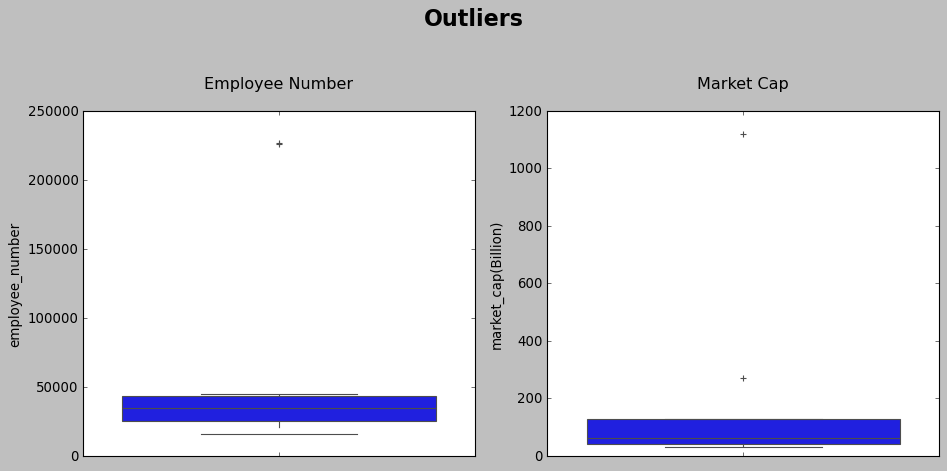

In [34]:
# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle('Outliers\n', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=1.5)

# Create boxplots for employee_number and market_cap(Billion)
sns.boxplot(y='employee_number', data=company_data_clean, ax=axes[0])
sns.boxplot(y='market_cap(Billion)', data=company_data_clean, ax=axes[1])

# Add titles
axes[0].set_title('Employee Number\n')
axes[1].set_title('Market Cap\n')

plt.tight_layout();

* `employee_number` - We observe that there are two outliers on the higher end, probably representing much larger companies. This will heavily skew the range or the employee numbers and based on the boxplot our outliers are above the 100,000 level.
* `market_cap(Billion)` - There is a noticable skew with two outliers on the higher end, indicating that a few companies have a significantly higher market capitilization. This will have a significant impact on further calculations and based on the boxplot our outliers are above the 200 level.

Based on the above, the actions we will need to take on outliers are as follows:
* `employee_number` - We should remove rows with employee numbers above 100,000.
* `market_cap(Billion)`  - We should remove rows with a market cap above 200 billion.
* However, in both these cases, eliminating rows will result in a significant loss of data, so instead we will simply use statistical methods that are less sensitive to ourliers (interquartile range and median) for measuring the spread and central tendency.

### 3. Data Summarization and Exploration

#### Descriptive Statistics

First, we will calculate summary statistics for numerical features in the dataset.

In [35]:
# Gererate descriptive statistics for the numerical columns
summary_stats = company_data_clean[['employee_number', 'market_cap(Billion)']].describe()

# Display the results rounded to 2 decimal places
print(summary_stats.round(2))

       employee_number  market_cap(Billion)
count            11.00                 8.00
mean          66253.36               213.96
std           79793.85               374.34
min           15900.00                31.60
25%           25417.50                41.84
50%           35000.00                62.92
75%           43335.50               128.09
max          227000.00              1120.00


Next, we will summarize our categorical features using frequency tables. Since there are no overlapping values in **'company_id'**, **'name'** and **'domain'**, We will only generate frequency tables for the remaining 2 'interesting' columns.

In [36]:
# Generate frequency tables for the categorical columns
categorical_columns = ['business_nature', 'type']

display_freq_table(company_data_clean, categorical_columns)


Frequency Table for business_nature:
                     %
business_nature       
Insurance        27.27
Banking           9.09
Railway           9.09
Communications    9.09
Telecom           9.09

Frequency Table for type:
                %
type             
public      81.82
government   9.09
private      9.09


#### Data Visualization

Now that we have clean company data, let's put it all together and take a visual look at our companies.

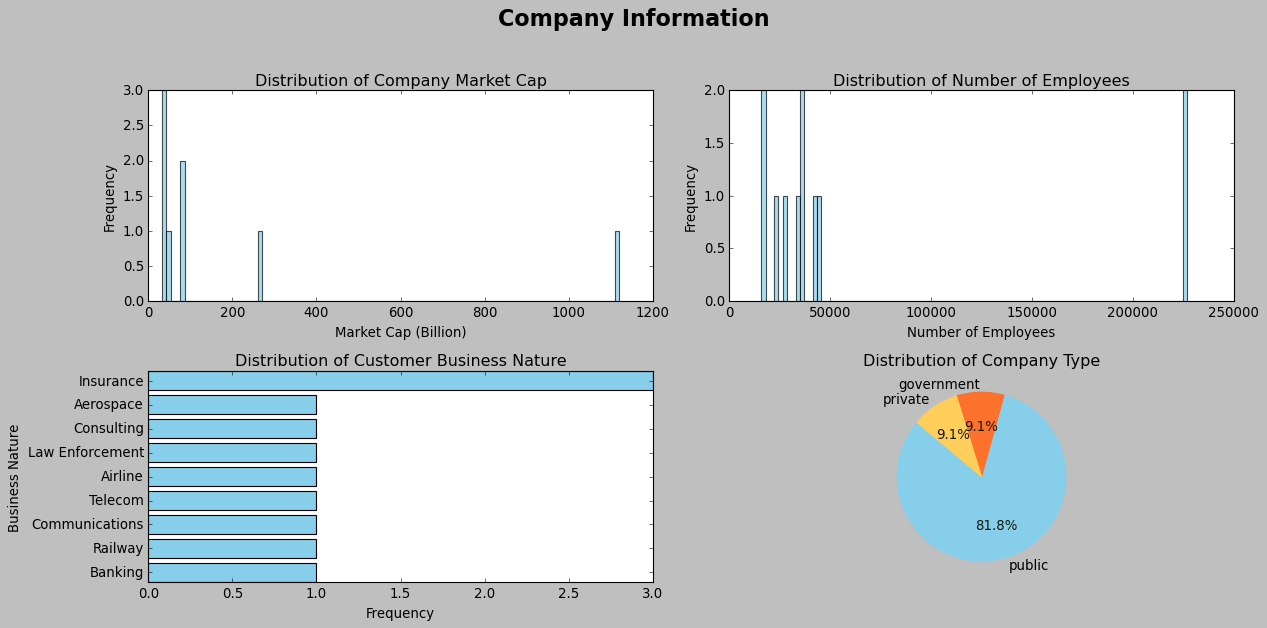

In [37]:
# Create figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
fig.suptitle('Company Information\n', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=1.5)

# Plot a histogram of the 'market_cap(Billion)' column
ax[0, 0].hist(company_data_clean['market_cap(Billion)'], bins=100, color='skyblue', alpha=0.7)

# Set market_cap(Billion) labels and title
ax[0, 0].set_xlabel('Market Cap (Billion)')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_title('Distribution of Company Market Cap')

# Plot a histogram of the 'employee_number' column
ax[0, 1].hist(company_data_clean['employee_number'], bins=100, color='skyblue', alpha=0.7)

# Set employee_number labels and title
ax[0, 1].set_xlabel('Number of Employees')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].set_title('Distribution of Number of Employees')

# Get value counts for business nature
business_nature_counts = company_data_clean['business_nature'].value_counts(ascending=True).tail(10)

# Plot a horizontal bar chart of the business nature distribution
ax[1, 0].barh(business_nature_counts.index, business_nature_counts.values, color='skyblue')

# Set business nature labels and title
ax[1, 0].set_xlabel('Frequency')
ax[1, 0].set_ylabel('Business Nature')
ax[1, 0].set_title('Distribution of Customer Business Nature')

# Plot a pie chart of the 'type' column
type_counts = company_data_clean['type'].value_counts()
wedges, texts, autotexts= ax[1, 1].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)

# Change font color or percentages
for autotext in autotexts:
    autotext.set_color('#16180c')

# Change wedge colors
wedges[0].set_color('skyblue')
wedges[1].set_color('#FC712B')
wedges[2].set_color('#FECD5A')

# Set type title
ax[1, 1].set_title('Distribution of Company Type')

plt.tight_layout();

#### Distribution Analysis

Let's examine the shape of the distribution for our numerical features:
* **Market Cap** - This looks like an asymetric distribution skewed to the right.
* **Number of Employees** - This looks like an asymetric distribution skewed to the right.

### 4. Conclusion

After exploring and visualizing our data we observe the following:
1. **Company Type**:
    * The majority of our companies are public (***81.8%***).      
2. **Business Nature**:
    * Our companies span a wide range of industries, with **Insurance** as the most common (***27.27%***).
3. **Number of Employees**:
    * Companies have a wide range of employees from ***15,900*** - ***227,000***
    * Most companies have a number of employees within the interquartile range of ***25,417*** - ***43,335***
    * The median number of employees the companies have is ***35,000***
4. **Market Cap**:
    * Companies have a wide range of market capitilization from ***31.6*** billion to ***1.12*** trillion.
    * Most companies have a market cap within the interquartile range of ***41.84*** - ***128.09*** billion.
    * The median market cap for the companies is ***62.92***

## <center>Aggregate Customer Data into Company Data</center>

### 1. Customer Dataset Data Aggregation

#### Create Aggregated Dataframe

First we will need to extract the relevant information about companies from the customer dataset. I identified the columns `company` and `business_nature` to be of interest for our analysis. We will perform the following aggregations:
* Count the number of customers per company.
* Calculate the average, minimum and maximum `target_mean` for each company.
* Count the amount of distinct `business_nature` values associated with each company.

In [38]:
# create new dataframe grouped by 'company'
agg_company_data = customer_data_clean.groupby('company').size().to_frame(name='customer_count')

# Change index name
agg_company_data.index.name = 'company_name'

# Group by 'company' and calculate the mean, min and max of 'target_mean'
agg_company_data = agg_company_data.join(customer_data_clean.groupby('company')['target_mean'].agg(['mean', 'min', 'max']))

# Group by 'company' and count the number fo unique values in 'business_nature'
agg_company_data = agg_company_data.join(customer_data_clean.groupby('company')['business_nature'].nunique().to_frame(name='Distinct Business Natures'))

# Sort by 'customer_count' and count in descending order
agg_company_data = agg_company_data.sort_values(by='customer_count', ascending=False)
agg_company_data.head(10)

,customer_count,mean,min,max,Distinct Business Natures
company_name,,,,,
unknown,204,15715.957338,-1950.875000,72159.250000,13
hsbc,40,45563.589217,13237.300000,188957.840000,2
hospital authority,36,41280.714130,15109.818000,141966.286667,5
pccw,30,26545.113944,15143.560000,55274.292000,5
hkt,28,27690.859964,12711.643333,74534.287500,4
hk government,25,40392.009153,15596.700000,101552.470000,1
cathay pacific airways,25,30493.292993,15253.050000,58091.250000,1
aia,22,45437.174667,15219.496667,112461.116667,6
mtr,20,25419.493733,13289.392000,50407.465000,7


We observe that the **'unknown'** category produces the highest amounts of `customer_count` and `Distinct Business Natures` values. However, this should be considered an outlier since it is significantly larger than the rest of the company amounts and will skew our distributions if used as is. I therefore decided to remove the **'unknown'** row from the `agg_company_data` dataframe.

In [39]:
# Drop 'unknown' row
agg_company_data.drop(index='unknown', inplace=True)
agg_company_data.head(10)

,customer_count,mean,min,max,Distinct Business Natures
company_name,,,,,
hsbc,40,45563.589217,13237.300000,188957.840000,2
hospital authority,36,41280.714130,15109.818000,141966.286667,5
pccw,30,26545.113944,15143.560000,55274.292000,5
hkt,28,27690.859964,12711.643333,74534.287500,4
hk government,25,40392.009153,15596.700000,101552.470000,1
cathay pacific airways,25,30493.292993,15253.050000,58091.250000,1
aia,22,45437.174667,15219.496667,112461.116667,6
mtr,20,25419.493733,13289.392000,50407.465000,7
sf express,20,28345.678850,17398.993333,56854.310000,5


#### Summarize The Aggregated Data

##### Descriptive Statistics

In [40]:
# Generate descriptive statistics on the entire aggregated dataframe
agg_company_data.describe().round(2)

,customer_count,mean,min,max,Distinct Business Natures
count,7219.00,7219.00,7219.00,7219.00,7219.00
mean,1.23,29570.06,28663.42,30760.67,1.06
std,1.31,18851.20,18638.32,20903.61,0.33
min,1.00,-1427.16,-1427.16,-1427.16,1.00
25%,1.00,18814.08,18110.11,18941.16,1.00
50%,1.00,24282.84,23429.22,24703.76,1.00
75%,1.00,33349.99,32017.85,34609.43,1.00
max,40.00,197165.64,197165.64,199720.77,7.00


##### Data Visualization

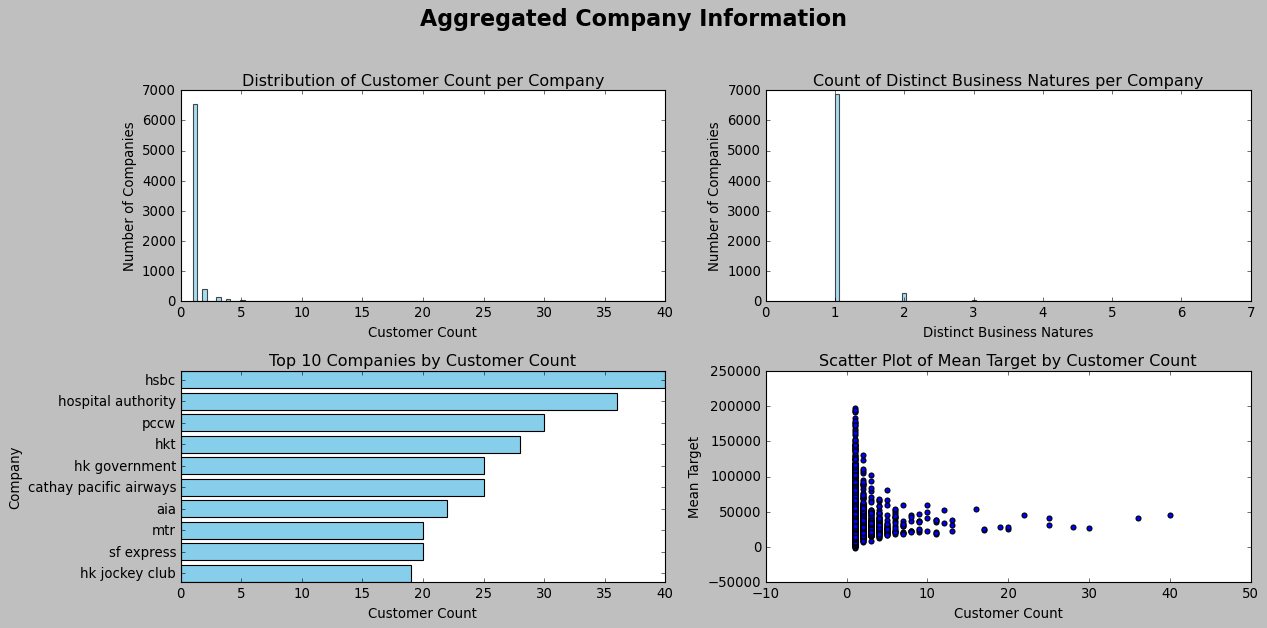

In [41]:
# Create figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
fig.suptitle('Aggregated Company Information\n', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=1.5)

# Plot a histogram of the 'customer_count' column
ax[0, 0].hist(agg_company_data['customer_count'], bins=100, color='skyblue', alpha=0.7)

# Set limit on x-axis
ax[0, 0].set_xlim(right=40)

# Set customer_count labels and title
ax[0, 0].set_xlabel('Customer Count')
ax[0, 0].set_ylabel('Number of Companies')
ax[0, 0].set_title('Distribution of Customer Count per Company')

# Plot a histogram of the 'Distinct Business Natures' column
ax[0, 1].hist(agg_company_data['Distinct Business Natures'], bins=100, color='skyblue', alpha=0.7)

# Set limit on x-axis
ax[0, 1].set_xlim(left=0, right=7)

# Set Distinct Business Nature labels and title
ax[0, 1].set_xlabel('Distinct Business Natures')
ax[0, 1].set_ylabel('Number of Companies')
ax[0, 1].set_title('Count of Distinct Business Natures per Company')

# Get top 10 value counts for companies
top_companies = agg_company_data.nlargest(10, 'customer_count')

# Plot a horizontal bar chart of the business nature distribution
ax[1, 0].barh(top_companies.index, top_companies['customer_count'], color='skyblue')

# Invert y-axis to descending order
ax[1, 0].invert_yaxis()

# Set top companies labels and title
ax[1, 0].set_xlabel('Customer Count')
ax[1, 0].set_ylabel('Company')
ax[1, 0].set_title('Top 10 Companies by Customer Count')

# Create a scatter plot of Mean Target by Customer Count
ax[1, 1].scatter(agg_company_data['customer_count'], agg_company_data['mean'])

# Set Mean Target by Customer Count labels and title
ax[1, 1].set_xlabel('Customer Count')
ax[1, 1].set_ylabel('Mean Target')
ax[1, 1].set_title('Scatter Plot of Mean Target by Customer Count')

plt.tight_layout()

##### Distribution Analysis

Let's examine the shape of the distribution for our numerical features:
* **Customer Count Per Company** - This looks like an asymetric distribution skewed to the right.
* **Distinct Business Nature** - This looks like an asymetric distribution skewed to the right.

##### Insight

* Most companies have a customer count of ***1***, with very few outliers that range up to ***40*** customers. (With ***204*** customers in the **'unknown'** category).
* Most companies have ***1*** distinct business nature, with very few outliers that range up to ***7*** (With ***13*** customers in the **'unknown'** category).
* Our top ***10*** companies by customer count include **'hsbc'**, **'hospital authority'** and **'pccw'**
* We still have a large amount of customers with unknown company values, our largest category.
* There apears to be no correlation between **mean target** and **customer count**, as most companies with customer counts of ***1*** contained the entire range of mean targets.

### 2. Dataset Merging

Let's combine the original company dataset with the aggregated company dataset. Before merging, we will need to change the column name in the company dataset to correspond with the name in the aggregated dataset. We will then join the two datasets using these column as the key.

In [42]:
# Change index name in the clean company dataframe
company_data_clean.rename(columns={'name': 'company_name'}, inplace=True)

# Combine datasets
combined_dataset = pd.merge(company_data_clean, agg_company_data, on='company_name', how='left')
combined_dataset

,company_id,company_name,domain,business_nature,employee_number,type,market_cap(Billion),customer_count,mean,min,max,Distinct Business Natures
0,00123122,hsbc,www.hsbc.com/,Banking,226059,public,78.45,40,45563.589217,13237.300000,188957.840000,2
1,878434523,aia,www.aia.com,Insurance,45000,public,1120.00,22,45437.174667,15219.496667,112461.116667,6
2,3423656,mtr,http://www.mtr.com.hk/en/customer/main/index.html,Railway,28035,public,271.00,20,25419.493733,13289.392000,50407.465000,7
3,452352,pccw,http://www.pccw.com/,Communications,22800,public,31.60,30,26545.113944,15143.560000,55274.292000,5
4,4342ff34,hkt,hkt.com,Telecom,15900,public,80.45,28,27690.859964,12711.643333,74534.287500,4
5,534534,manulife,https://www.manulife.com/,Insurance,34000,public,47.40,17,24931.345118,10058.813333,54885.790000,4
6,232131,cathay pacific airways,www.cathaypacific.com,Airline,35000,public,42.29,25,30493.292993,15253.050000,58091.250000,1
7,123555342,hk police force,https://www.police.gov.hk,Law Enforcement,36681,government,NaN,16,54101.222219,14877.435000,152179.670000,2
8,621621320,kpmg,home.kpmg,Consulting,227000,private,NaN,8,37215.301563,13746.510000,52247.217500,2
9,998411df,haeco,www.haeco.com,Aerospace,16641,public,NaN,13,22335.729231,15907.095000,32233.472500,4


Let's perform some calculations to find the companies with highest and lowest values in each of the following categories:
* Customer Count
* Mean Target value
* Max/Min Target Value
* Distinct Business Natures

In [43]:
# Calculate highest customer count
highest_customer_count = combined_dataset.loc[combined_dataset['customer_count'].idxmax(), 'company_name']

# Calculate highest mean target value
highest_mean = combined_dataset.loc[combined_dataset['mean'].idxmax(), 'company_name']

# Calculate and display highest max target value
highest_max = combined_dataset.loc[combined_dataset['max'].idxmax(), 'company_name']

# Calculate highest distinct busines natures
highest_distinct_business_natures = combined_dataset.loc[combined_dataset['Distinct Business Natures'].idxmax(), 'company_name']

# Calculate lowest customer count
lowest_customer_count = combined_dataset.loc[combined_dataset['customer_count'].idxmin(), 'company_name']

# Calculate lowest mean target value
lowest_mean = combined_dataset.loc[combined_dataset['mean'].idxmin(), 'company_name']

# Calculate lowest min target value
lowest_min = combined_dataset.loc[combined_dataset['min'].idxmin(), 'company_name']

# Calculate and display lowest distinct busines natures
lowest_distinct_business_natures = combined_dataset.loc[combined_dataset['Distinct Business Natures'].idxmin(), 'company_name']

# Create dataframe from data calculated above
data = {'Highest': [highest_customer_count, highest_mean, highest_max, highest_distinct_business_natures],
        'Lowest': [lowest_customer_count, lowest_mean, lowest_min, lowest_distinct_business_natures]}

index = ['customer_count', 'mean', 'max/min', 'distinct_business_natures']
observations = pd.DataFrame(data, index=index)
observations

,Highest,Lowest
customer_count,hsbc,kpmg
mean,hk police force,haeco
max/min,hsbc,manulife
distinct_business_natures,mtr,cathay pacific airways


Following the combination of the aggregated customer data into the company dataset, we observe the following:

Companies with the highest values: 

* **"hsbc"** has the highest customer count.
* **"hk police force"** has the highest mean target value.
* **"hsbc"** has the highest maximum target value.
* **"mtr"** has the highest amount of distinct business natures.

Companies with the lowest values: 

* **"kpmg"** has the lowest customer count.
* **"haeco"** has the lowest mean target value.
* **"manulife"** has the lowest mimimum target value.
* **"cathay pacific airways"** has the lowest amount of distinct business natures.

To finish off out analysis, let's see if there are any significant correlations between our companies' **employee number** and **market cap** to the aggregated data.

In [44]:
correlations = combined_dataset[['employee_number', 'market_cap(Billion)', 'customer_count', 'mean', 'min', 'max', 'Distinct Business Natures']].corr().round(3)
correlations.iloc[:2, 2:]

,customer_count,mean,min,max,Distinct Business Natures
employee_number,0.139,0.354,-0.107,0.321,-0.448
market_cap(Billion),-0.092,0.391,0.390,0.070,0.527


It apears that there are no significant correlations to be found, however there are a few noteworthy points:
* There is a medium positive correlation between a company's **market cap** and the amount of **distinct business natures**.
* There is a small positive correlation between the **number of employees** and higher **target mean** and **max** values.
* There is a small positive correlation between a company's **market cap** and higher **target mean** and **min** values.

To summarise:
* Companies with higher **market caps** are more likely to have a large amount of **distinct business natures**.
* Companies with higher **numbers of employees** are more likely to have higher **target means** and contain values in the upper range of observations.
* Companies with higher **market caps** are more likely to have higher **target means** while still containing values in the lower range of observations.